<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Working-with-Geospatial-Data" data-toc-modified-id="Working-with-Geospatial-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Working with Geospatial Data</a></span><ul class="toc-item"><li><span><a href="#Geospatial-Data-Handling-in-Python" data-toc-modified-id="Geospatial-Data-Handling-in-Python-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Geospatial Data Handling in Python</a></span></li><li><span><a href="#Loading-geospatial-data" data-toc-modified-id="Loading-geospatial-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading geospatial data</a></span></li></ul></li><li><span><a href="#Examining-geodata-with-GeoPandas" data-toc-modified-id="Examining-geodata-with-GeoPandas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Examining geodata with GeoPandas</a></span><ul class="toc-item"><li><span><a href="#What-the-DF" data-toc-modified-id="What-the-DF-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>What the DF</a></span></li><li><span><a href="#Reading-Metadata" data-toc-modified-id="Reading-Metadata-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Reading Metadata</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Get-different-metadata" data-toc-modified-id="Exercise:-Get-different-metadata-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span><em>Exercise: Get different metadata</em></a></span></li></ul></li><li><span><a href="#Getting-used-to-(geo)-dataframes" data-toc-modified-id="Getting-used-to-(geo)-dataframes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Getting used to (geo) dataframes</a></span></li><li><span><a href="#Visualizing-geospatial-data-using-matplotlib" data-toc-modified-id="Visualizing-geospatial-data-using-matplotlib-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualizing geospatial data using matplotlib</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Change-the-'female'-or-'male'-data-variable" data-toc-modified-id="Exercise:-Change-the-'female'-or-'male'-data-variable-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span><em>Exercise: Change the 'female' or 'male' data variable</em></a></span></li></ul></li><li><span><a href="#Mapping-our-geodata-(frame)" data-toc-modified-id="Mapping-our-geodata-(frame)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Mapping our geodata (frame)</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Show-different-shapefile" data-toc-modified-id="Exercise:-Show-different-shapefile-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span><em>Exercise: Show different shapefile</em></a></span></li></ul></li><li><span><a href="#Displaying-a-legend" data-toc-modified-id="Displaying-a-legend-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Displaying a legend</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Make-a-different-map-with-a-different-variable" data-toc-modified-id="Exercise:-Make-a-different-map-with-a-different-variable-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span><em>Exercise: Make a different map with a different variable</em></a></span></li></ul></li></ul></li></ul></div>

# Introducing Python and GIS


__Objectives:__  
  * Import geospatial libraries
  * Open shapefiles with Python
  * Interrogate data tables
  * Display shapefiles

## Working with Geospatial Data
Python has several popular libraries to work with geospatial data types.

There are two types of spatial data:

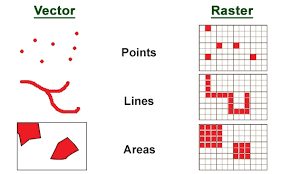

### Geospatial Data Handling in Python

__For vector data we will use:__

[GeoPandas](http://geopandas.org/)  

__For raster data we will use:__  
[Rasterio](https://rasterio.readthedocs.io/en/stable/intro.html)


__For both geospatial data types we will use:__  
- GDAL - Handles all GIS processing  
- Matplotlib - For plotting map data  
- Numpy - For interacting with data    


`GDAL` is necessary for interacting with geospatial data, while `matplotlib` and `numpy` are Python tools that can work with geospatial data once it has been loaded in.


### Loading geospatial data 

Lets start by loading a shapefile!  

We will begin by importing `gdal` and `geopandas` libraries for working with the data.

Also bring in `matplotlib` so we can show our map.

In [ ]:
# import our libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

#these are optional, but make our tables look nice
from IPython.display import display, HTML
from pandas.plotting import table

Yes pandas do plot...!

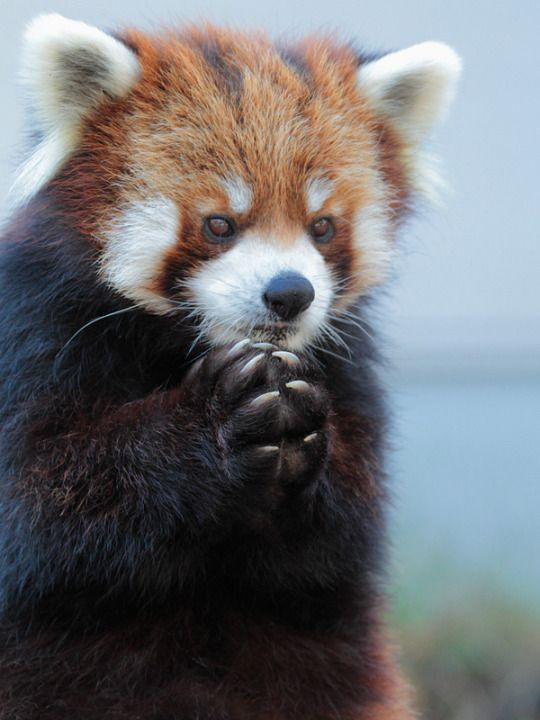

The command to open a file in `geopandas` is:  
```gdf = gpd.read_file('PATH_TO_YOUR_DATA')```

Our path will look like this:  
        ``` gdf = gpd.read_file("./data/shapefiles/LA_City_Neighborhood_Council_Demographics.shp")```

## Examining geodata with GeoPandas

The easiest way to get from a file to a quick visualization of the data is by loading it as a `GeoDataFrame` and calling the `plot` command.

### What the DF

Data frames (df) are `Pandas'` way of breaking down tables into views. Think of them as mini Excel Sheets or workbooks. The key benefit is that each time you want to see part of the data, you can select it into a data frame instead of working with the entire data set. `GeoPandas` takes `Pandas` functionality and adds geospatial ability to analyze and process those frames as geodata frames (gdf).

In [ ]:
gdf = gpd.read_file("./data/shapefiles/LA_City_Neighborhood_Council_Demographics.shp")


## Let's see our data's columns ##
for column in gdf.columns:
    print(column)

In [ ]:
## We can always preview our data using ##
print(gdf.head())

## In Jupyter we can just use:
#gdf.head()

### Reading Metadata

Geospatial data comes with data about the data, called metadata. There is a list of what's available  here:

http://geopandas.org/data_structures.html

When working across various data sets, we need to make sure coordinate reference system (CRS) are the same. So let's see what the CRS of our LA City Neighboorhood Council Demographics is.

In [ ]:
gdf = gpd.read_file("./data/shapefiles/LA_City_Neighborhood_Council_Demographics.shp")
print(gdf.crs)

####  _Exercise: Get different metadata_

### Getting used to (geo) dataframes

- Let's select `female` and `male` demographic data
     - `.loc[]` creates a subset of the data based on provided column fieldnames
     - `describe()` provides descriptive statistics
     - `diplay(HTML)` creates a pretty table   

*Note*: We will be selecting `geometry` for maintaing the spatial data properties, but it will not be __described()__ because that command __only works__ on __numeric__ data.

In [ ]:
sex_subset = gdf.loc[:,['female','male','geometry']]
desc = sex_subset.describe()

# this code below rounds the decimal places to 2 (.00)

display(HTML(desc.round(2).to_html()))

### Visualizing geospatial data using matplotlib

After having __`geopandas`__ read in the geodata, we can use __`matplotlib`__ to graph our data points:

In [ ]:
data_to_plot = sex_subset
# print(sex_subset.describe())
# Create a figure instance
df = pd.DataFrame(sex_subset.loc[:,['female']]) #first plot for female
df2 = pd.DataFrame(sex_subset.loc[:,['male']]) #seperate plot for male

# Note: the ro in "style" stands for "red circles", what might an "gx" do?
df.plot(style='ro')
df2.plot(style='bo')

#### _Exercise: Change the 'female' or 'male' data variable_

### Mapping our geodata (frame)

Having a __geodata frame__ makes our data plottable as a map, through the very simple `gdf.plot()` function.   

This functionality begins to showcase how `geopandas` is different from `pandas`.

*Note: We can specify a `figsize` (figure size) in `(width,height)` to change our map size.*

In [ ]:
gdf = gpd.read_file("./data/shapefiles/LA_City_Neighborhood_Council_Demographics.shp")
gdf.plot()
# control the size with figsize
#gdf.plot(figsize=(5,5))

#### _Exercise: Show different shapefile_

In [ ]:
#schools = ????

### Displaying a legend

What happens if you want to add a legend or style the map more?

Because __`geopandas`__ is built ontop of __`pandas`__

And __`pandas`__ is built ontop of __`matplotlib`__...

So: __`matplotlib`__ is required to customize our map.

Visually, it looks a bit like this:

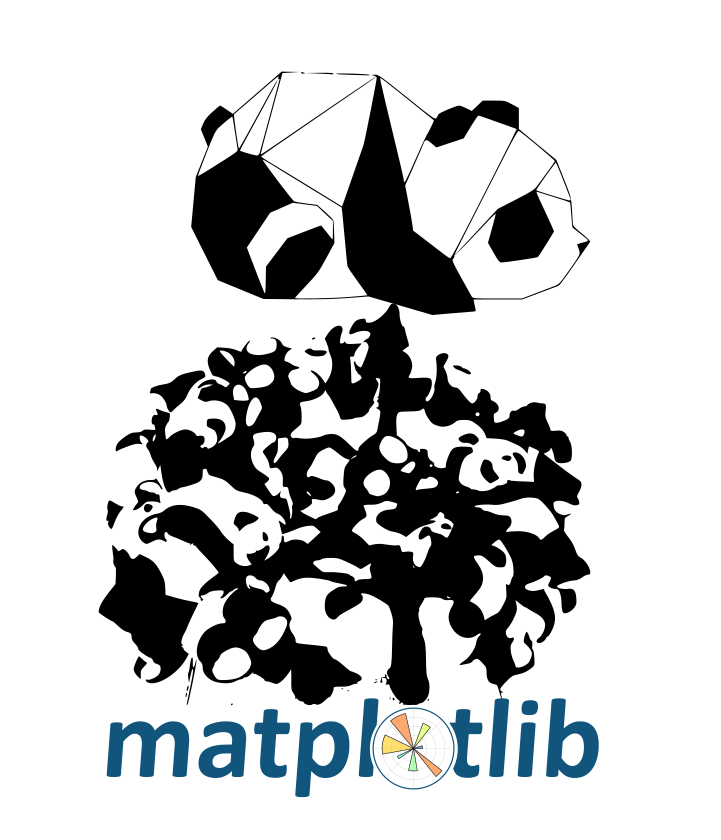

Instead of relying on the geopandas wrapper, `__plot()__` needs to be tweaked a bit to enable __`matplotlib`__ to customize.

In [ ]:
# add a figure and axis variable, and use matplotlib (plt) to define it
fig, ax = plt.subplots(1)
gdf.plot(ax=ax)

__Various parameters customize the plot:__   
+      __column__ - creates a choropleth from one column of data (ex. `female`)   
+      __legend__ - shows a legend (ex. `True` or `False`)  
+      __cmap__ - uses a color map (ex. `copper`)  

A list of matplotlib color maps can be found here:
+      https://matplotlib.org/gallery/color/colormap_reference.html

In [ ]:
fig, ax = plt.subplots(1,figsize=(15, 15))
# to add a title we use
fig.suptitle('Los Angeles City Female Population')

# we can also specify a column to make our map into a choropleth
gdf.plot(ax=ax,column='female',legend=True,cmap='copper_r')

#### _Exercise: Make a different map with a different variable_

##### And now for something completely different!

 (Not really)